## Study of the Swiss electrical mix (and imports) between 2016 and 2021

### 0. Configuring EcoDynElec and loading the data

In [28]:
import numpy as np
# Autoreload
%load_ext autoreload
%autoreload 2

# Imports
import matplotlib.pyplot as plt
import pandas as pd

from ecodynelec.parameter import Parameter  # Import the class to manipulate parameters
from etude_stat.analysis_functions import generate_data, load_data
from etude_stat.analysis_functions import plot_metrics, format_data_0

# Basic configuration
my_config = Parameter()
my_config.freq = "H"
my_config.ctry = ['AT', 'CH', 'DE', 'FR', 'IT']
#my_config.ctry = ['ES', 'CH', 'DE', 'FR', 'BE', 'GB', 'IT']
my_config.target = ['CH']
my_config.data_cleaning = True
my_config.path.generation = "./test_data/downloads/generations/"
my_config.path.exchanges = "./test_data/downloads/exchanges/"
my_config.residual_global = False
my_config.residual_local = True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
#### 1.1 Download and generate data files
# This can done once, then the electrical mix and impact files will be saved and can be loaded directly (see 1.2)
years = ['2016', '2017', '2018', '2019', '2020', '2021']
raws, mixs, impacts = generate_data(my_config, years)

#### 1.2 Load data from saved files
#If the files for the years of interest have already been generated, they can be loaded directly in this section
# raws, mixs, impacts = load_data(my_config, years)
# raws = {y: raws[y]['CH'] for y in years}
# mixs = {y: mixs[y]['CH'] for y in years}
# impacts = {y: impacts[y]['CH'] for y in years}

#### 1.3 Pre-processing the data
# Here we reformat the data to make it easier to manipulate and plot
raw_production = format_data_0(raws)
electricity_mix = format_data_0(mixs)
electricity_impact = format_data_0(impacts)

C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\ecodynelec\parameter.py:283: FileNotFoundWarning: Unidentified savedir directory C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\etude_stat\test_data\results_res_i_84g\2016. It was created as new empty directory.
  warnings.warn(msg, FileNotFoundWarning)


C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\ecodynelec\parameter.py:283: FileNotFoundWarning: Unidentified savedir directory C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\etude_stat\test_data\results_res_i_84g\2017. It was created as new empty directory.
  warnings.warn(msg, FileNotFoundWarning)


C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\ecodynelec\parameter.py:283: FileNotFoundWarning: Unidentified savedir directory C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\etude_stat\test_data\results_res_i_84g\2018. It was created as new empty directory.
  warnings.warn(msg, FileNotFoundWarning)


C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\ecodynelec\parameter.py:283: FileNotFoundWarning: Unidentified savedir directory C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\etude_stat\test_data\results_res_i_84g\2019. It was created as new empty directory.
  warnings.warn(msg, FileNotFoundWarning)


C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\ecodynelec\parameter.py:283: FileNotFoundWarning: Unidentified savedir directory C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\etude_stat\test_data\results_res_i_84g\2020. It was created as new empty directory.
  warnings.warn(msg, FileNotFoundWarning)


C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\ecodynelec\parameter.py:283: FileNotFoundWarning: Unidentified savedir directory C:\Users\aymeric.bourdy\PycharmProjects\EcoDynElec\etude_stat\test_data\results_res_i_84g\2021. It was created as new empty directory.
  warnings.warn(msg, FileNotFoundWarning)


In [32]:
# Production mix of each country
producing_electricity_impact = electricity_impact['df'] / electricity_mix['df']
producing_electricity_impact = producing_electricity_impact * 1000  # convert kgCO2eq/kWh -> gCO2eq/kWh

Dans ce notebook, nous réalisons une analyse historique du mix énergétique Suisse sur 5 ans, entre 2016 et 2021. On dispose des données de production et d'échange d'électricité européennes, heure par heure, desquelles on calcule le mix électrique Suisse et son impact carbonne (en gramme de CO2 par kWh).
On utilise principalement deux données, exprimmées en pourcentage de l'électricité consommée dans le pays :
- Le **mix producteur** désigne l'électricité produite dans le pays désigné. Il ne contient que les sources locales. Lorsque l'on converti le mix producteur en kWh, on obtient la **production d'électricité** du pays.
- Le **mix consommateur** désigne l'électricité consommée dans le pays désigné. Il contient les sources locales ainsi que l'import d'électricité d'autres pays. Lorsque l'on converti le mix consommateur en kWh, on obtient la **consommation d'électricité** du pays.

Ces données permettent de calculer l'**impact carbone heure par heure** de l'électricité produite, et consommée, dans le pays (ces deux impacts sont donc différents), puis d'étudier les sources de ces émissions.

## 1. Analyse inter-annuelle

### 1.1. Mix d'électricité

Consommation d'électricité par année en Suisse (production locale + importations nettes)

In [4]:
df = electricity_mix['raw_df'].resample('Y').mean()
local_cols = df.mean().nlargest(20).index.tolist()
for f in local_cols:
    df[f] = df[f].map(lambda x: f'{x * 100:.0f} %')
df.index = pd.Series(years)

yearly = raw_production['raw_df'].resample('Y').sum().sum(axis=1).map(lambda x: f'{x / 1000:.2f} GWh')
yearly.index = pd.Series(years)

In [5]:
print(yearly)

2016    63463.60 GWh
2017    64816.20 GWh
2018    65928.32 GWh
2019    66036.88 GWh
2020    63419.46 GWh
2021    65138.17 GWh
dtype: object


Répartition des 8 principales sources d'électricité en Suisse

In [6]:
print(df[local_cols])

     Nuclear_CH Residual_Hydro_Run-of-river_and_poundage_CH   
2016       21 %                                        18 %  \
2017       22 %                                        16 %   
2018       26 %                                        15 %   
2019       27 %                                        15 %   
2020       26 %                                        16 %   
2021       21 %                                        16 %   

     Hydro_Water_Reservoir_CH Hydro_Pumped_Storage_CH Residual_Other_CH   
2016                      8 %                     5 %               7 %  \
2017                      9 %                     7 %               6 %   
2018                     11 %                     7 %               6 %   
2019                     12 %                     8 %               6 %   
2020                     12 %                     7 %               5 %   
2021                     12 %                     7 %               4 %   

     Nuclear_FR Residual_Hydro_W

Consommation par mois en 2021

In [25]:
yearly = raw_production['raw_df']
yearly = yearly.loc[[d.year == 2021 for d in yearly.index]]
yearly = yearly.resample('M').sum().sum(axis=1).map(lambda x: x / 1000)  #.map(lambda x: f'{x / 1000:.2f} GWh')
yearly.index = [f'{d.month_name()}' for d in yearly.index]

In [26]:
print(yearly)

January      6265.002181
February     5539.923980
March        5715.270302
April        5045.933538
May          5169.548946
June         4833.408417
July         4959.362489
August       4876.006888
September    4917.222845
October      5484.064789
November     5940.220975
December     6392.209387
dtype: float64


Text(0, 0.5, 'Electricity consumption (GWh)')

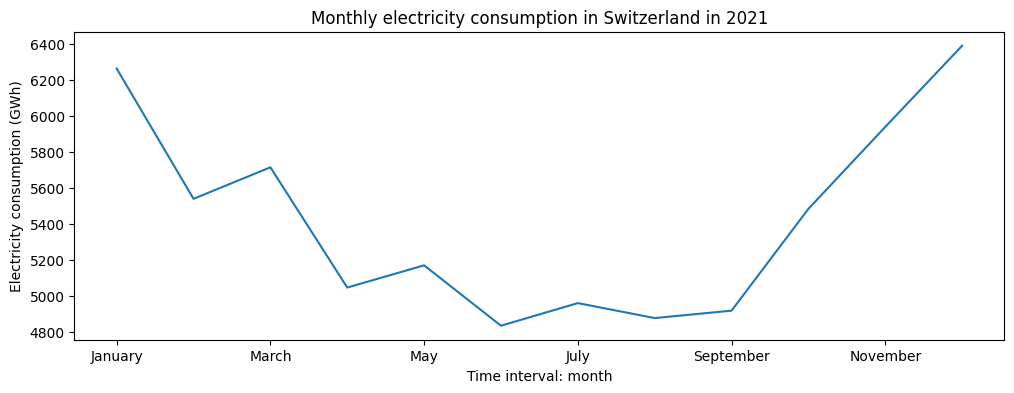

In [27]:
yearly.plot(figsize=(12, 4), title='Monthly electricity consumption in Switzerland in 2021')
plt.xlabel('Time interval: month')
plt.ylabel('Electricity consumption (GWh)');

In [10]:
yearly = raw_production['raw_df']
yearly = yearly.loc[[d.year == 2019 for d in yearly.index]]
yearly = yearly.resample('M').sum().sum(axis=1).map(lambda x: f'{x / 1000:.2f} GWh')
yearly.index = [f'{d.month_name()}' for d in yearly.index]
print(yearly)

January      6249.63 GWh
February     5510.65 GWh
March        5806.91 GWh
April        5040.20 GWh
May          5344.58 GWh
June         5128.28 GWh
July         4919.64 GWh
August       4902.23 GWh
September    5250.27 GWh
October      5852.04 GWh
November     5997.30 GWh
December     6035.15 GWh
dtype: object


In [11]:
ordered_countries = ['CH', 'DE', 'FR', 'AT', 'IT', 'Other']
colormap = {
    'sum': 'lightgray',
    'CH': '#1f77b4',
    'DE': '#c62728',
    'FR': '#2ca02c',
    'IT': '#9467bd',
    'AT': '#ff7f0e',
    'Other': '#e377c2'
}
ordered_colors = [colormap[c] for c in ordered_countries]

In [12]:
fatal_sources = ['Solar', 'Waste', 'Wind_Offshore', 'Wind_Onshore', 'Hydro_Run-of-river_and_poundage', 'Marine',
                 'Other_renewable']

Mix moyen par pays fournisseur de l'électricité (moyenne sur une semaine pendant les 5 ans de l'étude)

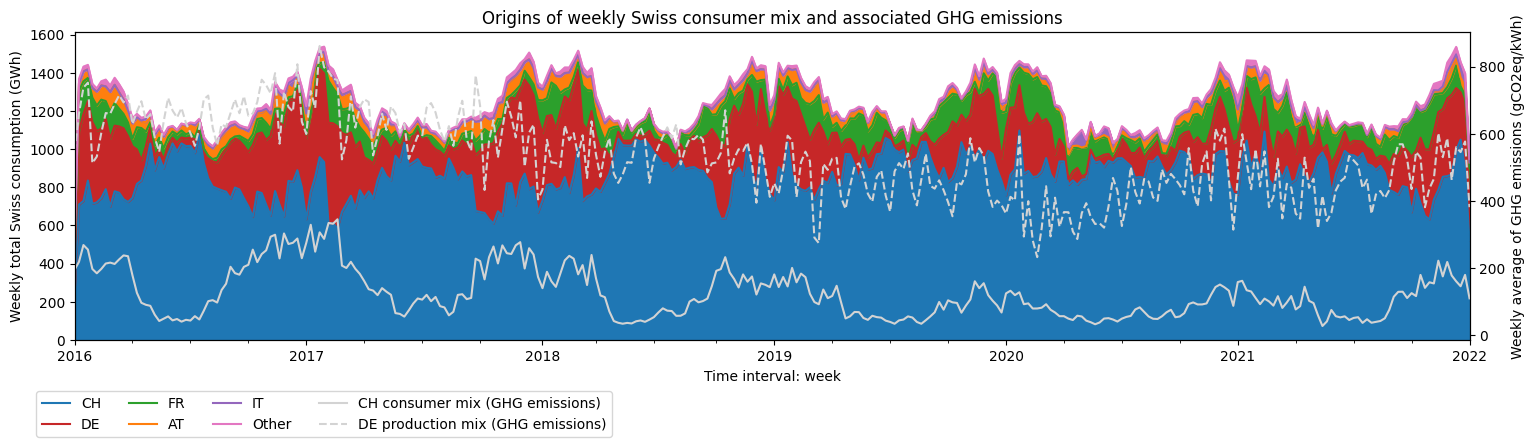

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title("Origins of weekly Swiss consumer mix and associated GHG emissions")
mix_import = electricity_mix['df'].drop(['sum'], axis=1)
mix_import = mix_import.multiply(raw_production['df']['sum'], axis='index').resample('W').sum() /1000
mix_import[ordered_countries].plot.area(ax=ax1, color=ordered_colors, legend=False)
ax1.set_xlabel('Time interval: week')
ax1.set_ylabel('Weekly total Swiss consumption (GWh)')

ax2 = ax1.twinx()
ch_consumer_impact = (electricity_impact['df']['sum'] * 1000).resample('W').mean() # convert kgCO2eq/kWh -> gCO2eq/kWh
ch_consumer_impact.plot(ax=ax2, linestyle='-', color=[colormap['sum']])
de_producing_impact = producing_electricity_impact['DE'].resample('W').mean()
de_producing_impact.plot(ax=ax2, linestyle='--', color=[colormap['sum']])
ax2.set_ylabel('Weekly average of GHG emissions (gCO2eq/kWh)')

fig.legend(np.concatenate([ax1.get_lines(), ax2.get_lines()]),
           np.concatenate([ax1.get_legend_handles_labels()[1], ['CH consumer mix (GHG emissions)', 'DE production mix (GHG emissions)']]),
           loc='upper left', ncol=4, bbox_to_anchor=(0.1, 0));

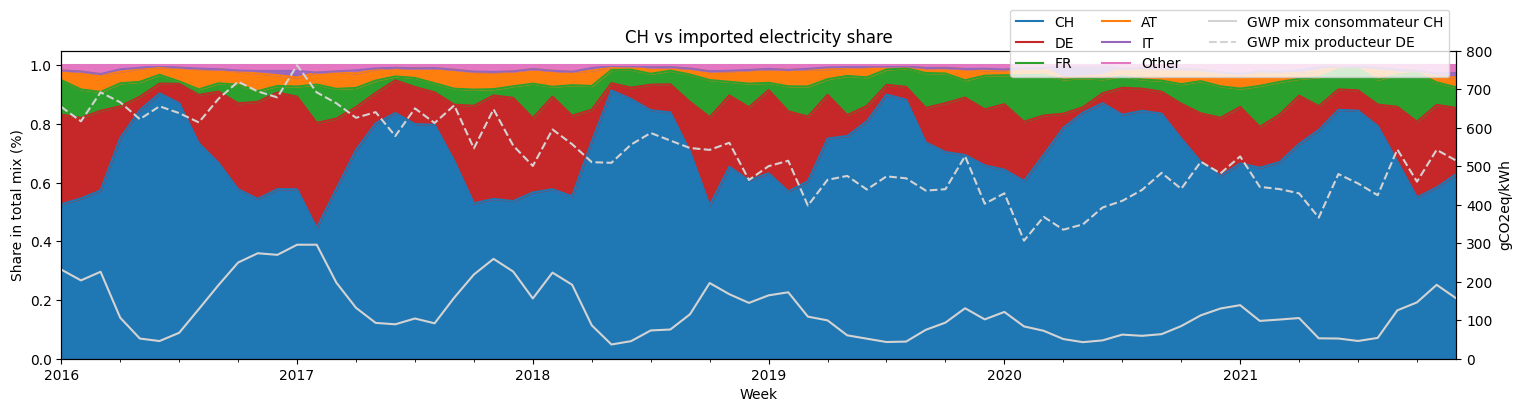

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title("CH vs imported electricity share")
importations = electricity_mix['df'].drop(['sum'], axis=1)
#importations['imported'] = importations.sum(axis=1)
#importations['CH'] = electricity_mix['df']['CH']
importations = importations.resample('M').mean()
importations[ordered_countries].plot.area(ax=ax1, color=ordered_colors, legend=False)
ax1.set_xlabel('Week')
ax1.set_ylabel('Share in total mix (%)')

ax2 = ax1.twinx()
producing_electricity_impact['sum'].resample('M').mean().plot(ax=ax2, linestyle='-', color=[colormap['sum']])
producing_electricity_impact['DE'].resample('M').mean().plot(ax=ax2, linestyle='--', color=[colormap['sum']])
ax2.set_ylim([0, 800])
ax2.set_ylabel('gCO2eq/kWh');

fig.legend(np.concatenate([ax1.get_lines(), ax2.get_lines()]),
           np.concatenate([ax1.get_legend_handles_labels()[1], ['GWP mix consommateur CH', 'GWP mix producteur DE']]),
           loc='upper right', ncol=3, bbox_to_anchor=(0.9, 1));

Etude annuelle :

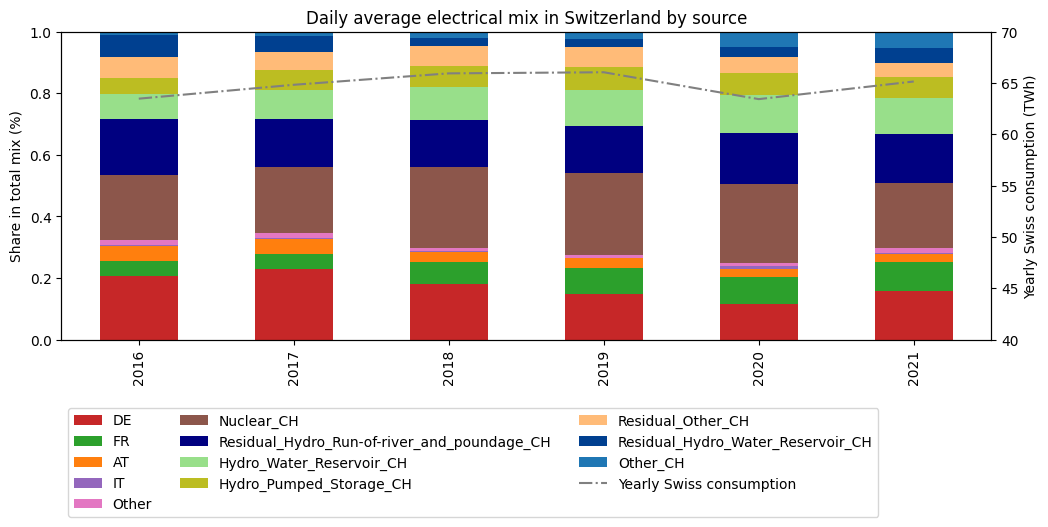

In [15]:
from etude_stat.analysis_functions import get_metrics

metrics = ['mean']  # Metrics to plot
title = 'daily mix'
fig, ax = plt.subplots(len(metrics), 1, figsize=(12, 4 * len(metrics)))
if len(metrics) == 1:
    ax = [ax]

compute_mix = electricity_mix['df'][ordered_countries].drop('CH', axis=1)
local_mix = electricity_mix['raw_df'].resample('W').mean()
local_mix = local_mix.drop(local_mix.loc[:, [not k.endswith('CH') or 'Mix' in k for k in local_mix.columns]], axis=1)
local_cols = local_mix.mean().nlargest(len(ordered_countries)).index.tolist()
local_mix['Other_CH'] = local_mix.drop(local_cols, axis=1).sum(axis=1)

colormap_extended = colormap | {
    'Nuclear_CH': '#8c564b',
    'Residual_Hydro_Run-of-river_and_poundage_CH': '#000080',  # Couleur bleu marine
    'Residual_Hydro_Water_Reservoir_CH': '#004090',  # Couleur bleu marine
    'Hydro_Water_Reservoir_CH': '#98df8a',
    'Residual_Other_CH': '#ffbb78',
    'Hydro_Pumped_Storage_CH': '#bcbd22',
    'Hydro_Run-of-river_and_poundage_CH': '#17becf',
    'Other_CH': '#1f77b4'
}
compute_mix = pd.concat([compute_mix, local_mix[local_cols], local_mix['Other_CH']], axis=1)
colors = [colormap_extended[c] for c in compute_mix.columns]

metric_values = get_metrics(years, compute_mix, metrics, 'Y')
#consumption_metrics = get_metrics(years, raw_production['df']['sum'].resample('D').sum()/1000, metrics, 'Y',
#                                  label=["Daily Swiss consumption"])

for i in range(len(metrics)):
    metric = metrics[i]
    pdf = metric_values[metric]
    ax2 = ax[i].twinx()
    ax[i] = metric_values[metric].plot.bar(ax=ax[i], stacked=True, color=colors, legend=True)
    #consumption_metrics[metric].plot(ax=ax2, linestyle='-.', color='gray', legend=False)
    yearly_consumption = raw_production['df']['sum'].resample('Y').sum() / 1e6
    yearly_consumption.index = metric_values[metric].index
    yearly_consumption.plot(ax=ax2, linestyle='-.', color='gray', legend=False, label='Yearly Swiss consumption')
    ax[i].set_title(f'Daily average electrical mix in Switzerland by source')
    ax[i].set_label('date')
    ax[i].set_ylim(0, 1)
    ax2.set_ylim(40, 70)
    ax[i].set_ylabel('Share in total mix (%)')
    ax2.set_ylabel('Yearly Swiss consumption (TWh)')
    handles, labels = ax[i].get_legend_handles_labels()
    handles.append(ax2.get_lines()[0])
    labels.append(ax2.get_legend_handles_labels()[1][0])
    ax[i].legend(handles, labels, ncol=3,
                 loc='upper left', bbox_to_anchor=(0, -0.2))

Impact of consumption mix over five years

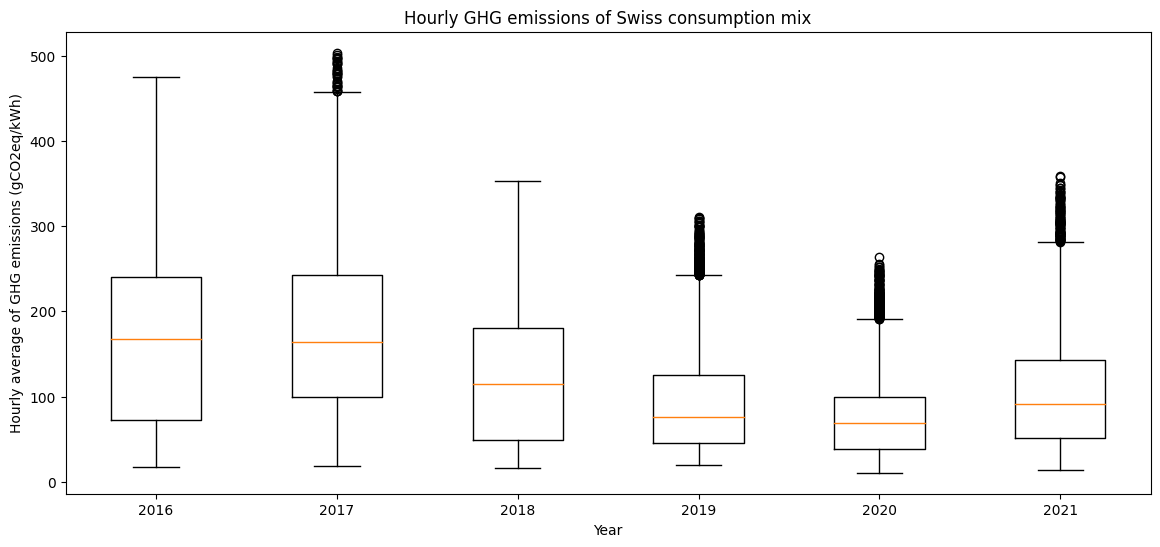

In [33]:
fig, ax = plt.subplots(figsize=(14, 6))
data = electricity_impact['df'].astype('float32')
data = data * 1000  # convert to gCO2eq/kWh
data = pd.DataFrame(data['sum'])
data['Year'] = [date.year for date in data.index]
grouped_data = data.groupby('Year')
seasonal_data = [grouped_data.get_group(season)[data.columns[0]] for season in grouped_data.groups]
#seasonal_data.boxplot(ax=ax)
ax.boxplot(seasonal_data)
ax.set_xticklabels(grouped_data.groups.keys())
ax.set_title('Hourly GHG emissions of Swiss consumption mix')
ax.set_xlabel('Year')
ax.set_ylabel('Hourly average of GHG emissions (gCO2eq/kWh)');

Impact of production mix over five years

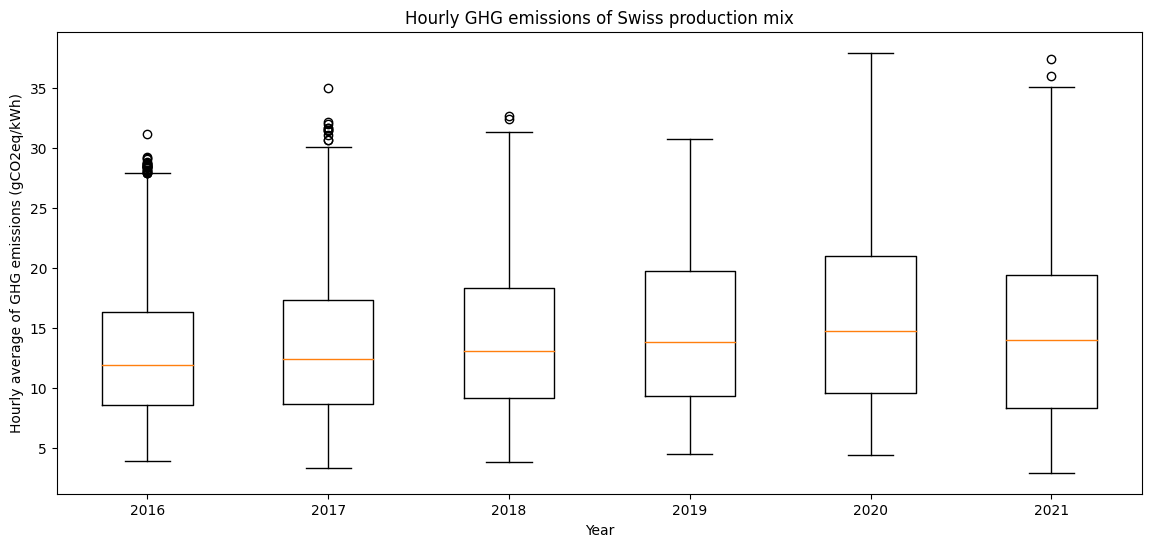

In [34]:
fig, ax = plt.subplots(figsize=(14, 6))
data = electricity_impact['raw_df'].astype('float32')
data = data * 1000  # convert to gCO2eq/kWh
data = data.drop(data.loc[:, [not k.endswith('CH') or 'Mix' in k for k in data.columns]], axis=1)
data = pd.DataFrame(data.sum(axis=1))
data['Year'] = [date.year for date in data.index]
grouped_data = data.groupby('Year')
seasonal_data = [grouped_data.get_group(season)[data.columns[0]] for season in grouped_data.groups]
#seasonal_data.boxplot(ax=ax)
ax.boxplot(seasonal_data)
ax.set_xticklabels(grouped_data.groups.keys())
ax.set_title('Hourly GHG emissions of Swiss production mix')
ax.set_xlabel('Year')
ax.set_ylabel('Hourly average of GHG emissions (gCO2eq/kWh)');

Zoom sur la décomposition des sources de l'éléctricité en Suisse
- Sources locales et import (6 principales)
- Sources locales (6 principales)

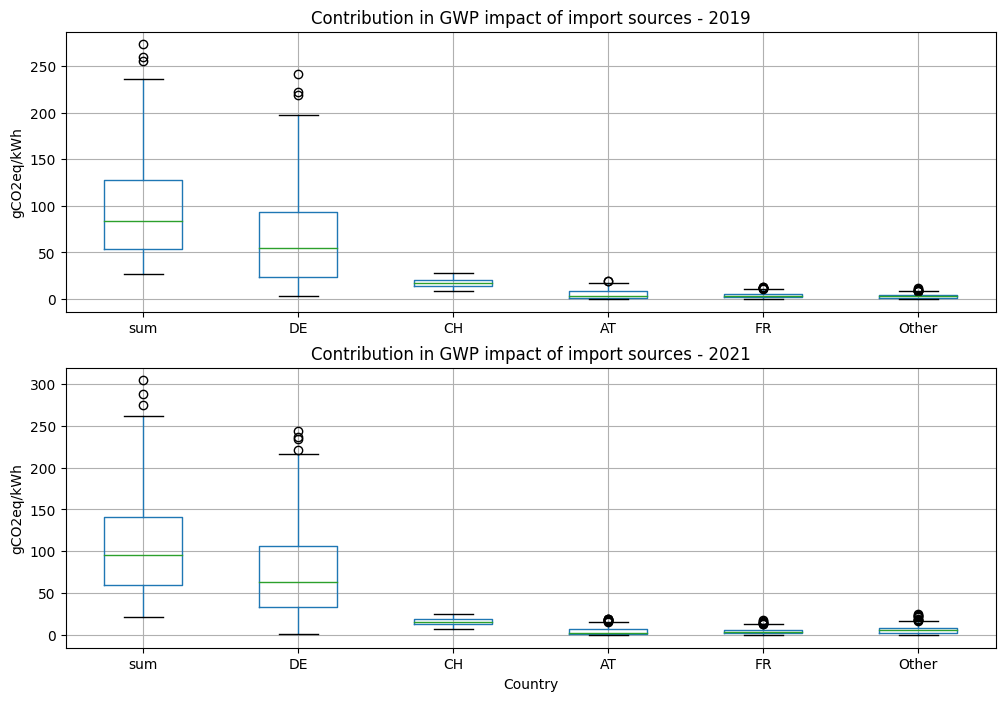

In [20]:
# import sources
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
data = electricity_impact['df'].astype('float32').resample('D').mean()
data = data * 1000  # convert to gCO2eq/kWh
#data = data.drop(data.loc[:, [not 'Mix' in k for k in data.columns]], axis=1)
local_impact = data.loc[pd.date_range('2019-01-01', '2019-12-31')]
local_cols = local_impact.mean().nlargest(6).index.tolist()
local_impact[local_cols].boxplot(ax=ax[0])
ax[0].set_title('Contribution in GWP impact of import sources - 2019')
ax[0].set_ylabel('gCO2eq/kWh')
local_impact = data.loc[pd.date_range('2021-01-01', '2021-12-31')]
local_impact[local_cols].boxplot(ax=ax[1])
ax[1].set_title('Contribution in GWP impact of import sources - 2021')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('gCO2eq/kWh');

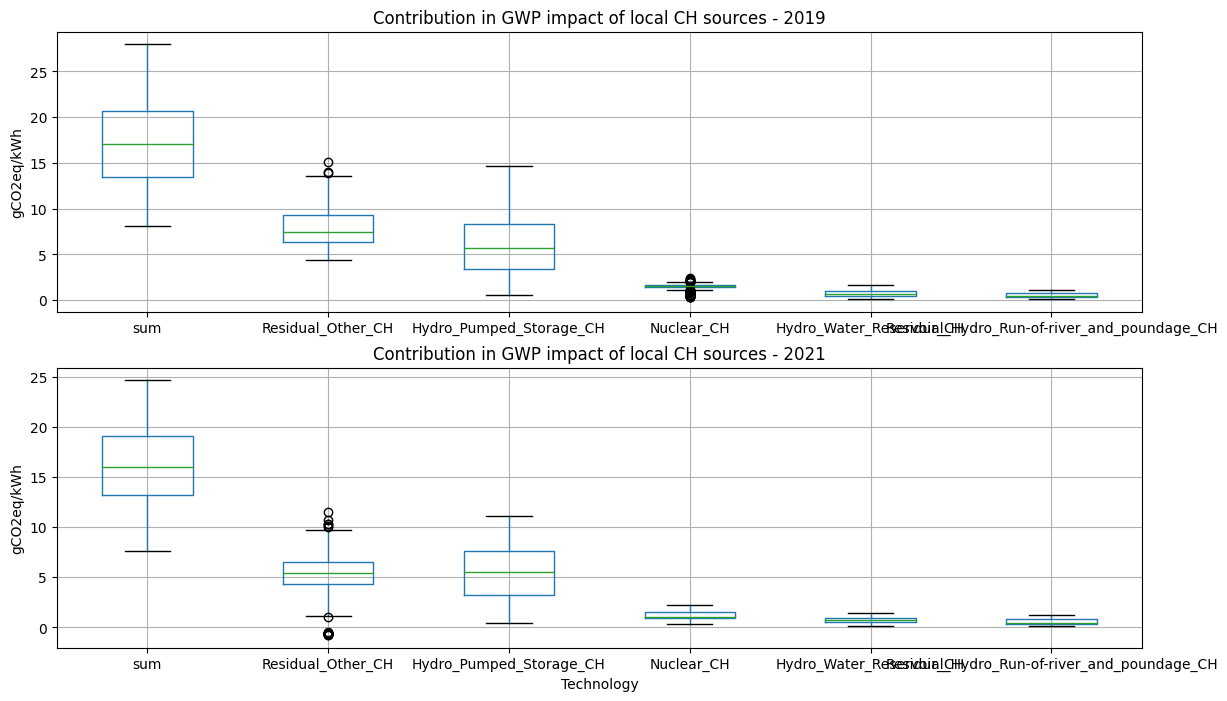

In [21]:
# local sources
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
data = electricity_impact['raw_df'].astype('float32').resample('D').mean()
data = data * 1000  # convert to gCO2eq/kWh
data = data.drop(data.loc[:, [not k.endswith('CH') or 'Mix' in k for k in data.columns]], axis=1)
data['sum'] = data.sum(axis=1)
local_impact = data.loc[pd.date_range('2019-01-01', '2019-12-31')]
local_cols = local_impact.mean().nlargest(6).index.tolist()
local_impact[local_cols].boxplot(ax=ax[0])
ax[0].set_title('Contribution in GWP impact of local CH sources - 2019')
ax[0].set_ylabel('gCO2eq/kWh')
local_impact = data.loc[pd.date_range('2021-01-01', '2021-12-31')]
local_impact[local_cols].boxplot(ax=ax[1])
ax[1].set_title('Contribution in GWP impact of local CH sources - 2021')
ax[1].set_xlabel('Technology')
ax[1].set_ylabel('gCO2eq/kWh');

ValueError: When stacked is True, each column must be either all positive or all negative. Column 'Residual_Hydro_Water_Reservoir_CH' contains both positive and negative values

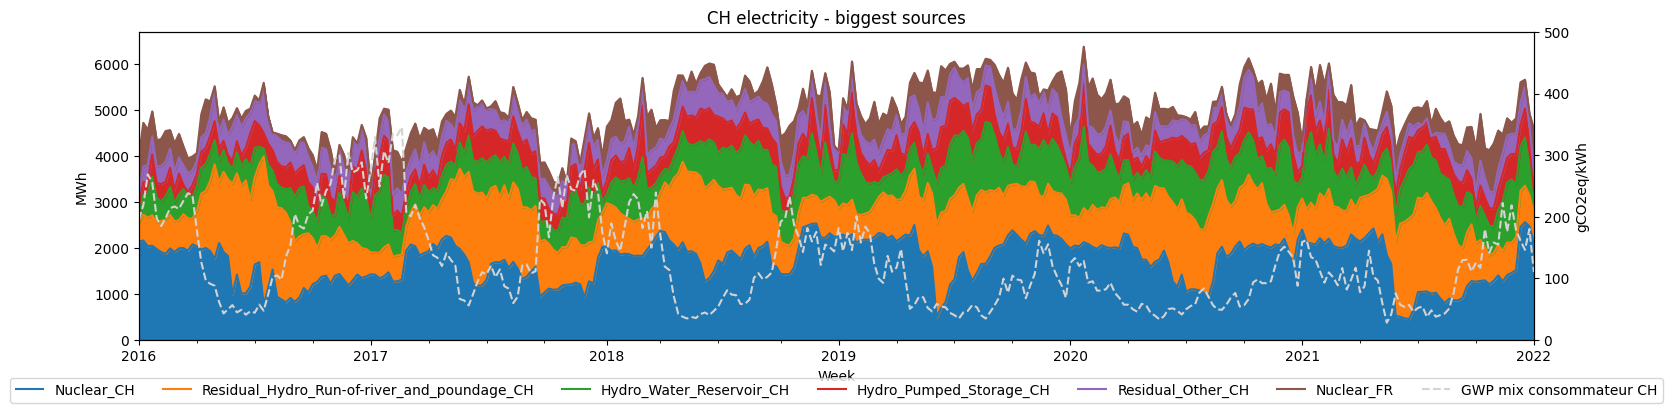

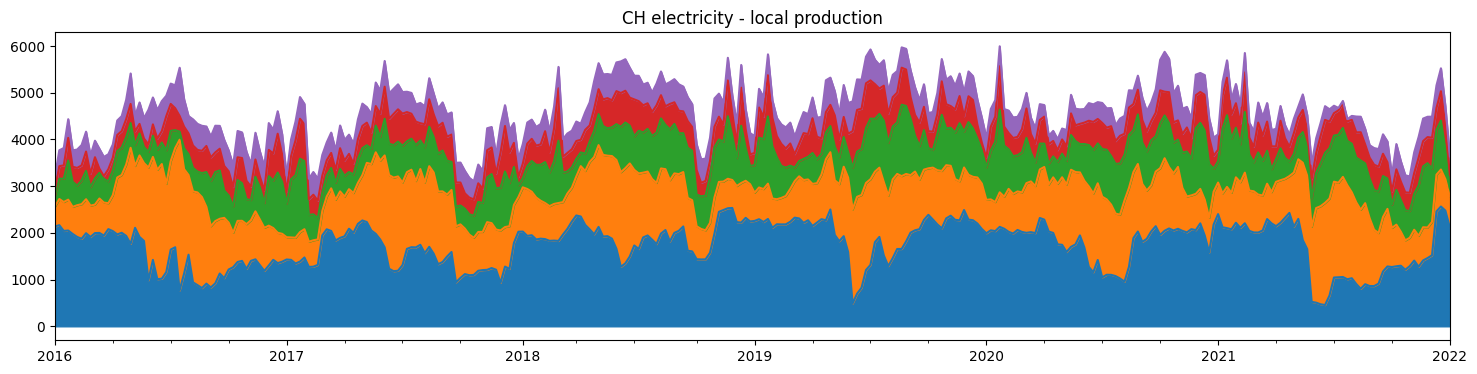

In [22]:
# local + import sources

fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title('CH electricity - biggest sources')

df = raw_production['raw_df'].resample('W').mean()
local_cols = df.mean().nlargest(6).index.tolist()
df[local_cols].plot.area(ax=ax1, legend=False)
plt.xlabel('Week')
plt.ylabel('MWh')

ax2 = ax1.twinx()
producing_electricity_impact['sum'].resample('W').mean().plot(ax=ax2, linestyle='--', color=[colormap['sum']])
ax2.set_ylim([0, 500])
ax2.set_ylabel('gCO2eq/kWh')

ax1.legend(np.concatenate([ax1.get_lines(), ax2.get_lines()]),
           np.concatenate([ax1.get_legend_handles_labels()[1], ['GWP mix consommateur CH']]),
           loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1))

# local sources

fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title('CH electricity - local production')

df = raw_production['raw_df'].resample('W').mean()
df = df.drop(df.loc[:, [not k.endswith('CH') or 'Mix' in k for k in df.columns]], axis=1)
local_cols = df.mean().nlargest(6).index.tolist()
df[local_cols].plot.area(ax=ax1, legend=False)
plt.xlabel('Week')
plt.ylabel('MWh')

ax2 = ax1.twinx()
producing_electricity_impact['CH'].resample('W').mean().plot(ax=ax2, linestyle='-', color=[colormap['sum']])
ax2.set_ylim([0, 40])
ax2.set_ylabel('gCO2eq/kWh')

ax1.legend(np.concatenate([ax1.get_lines(), ax2.get_lines()]),
           np.concatenate([ax1.get_legend_handles_labels()[1], ['GWP mix producteur CH']]),
           loc='upper center', ncol=7, bbox_to_anchor=(0.5, -0.1));

La part d'éolien semble peu varier mais la part de solaire augmente elle à partir de 2020. Attention cependant au fait qu'avant cette année, les données ENTSEO-E sont incomplètes (elles sont dans le résidu, non calculé ici).

### 1.2 Saisonalité :

Jours types :

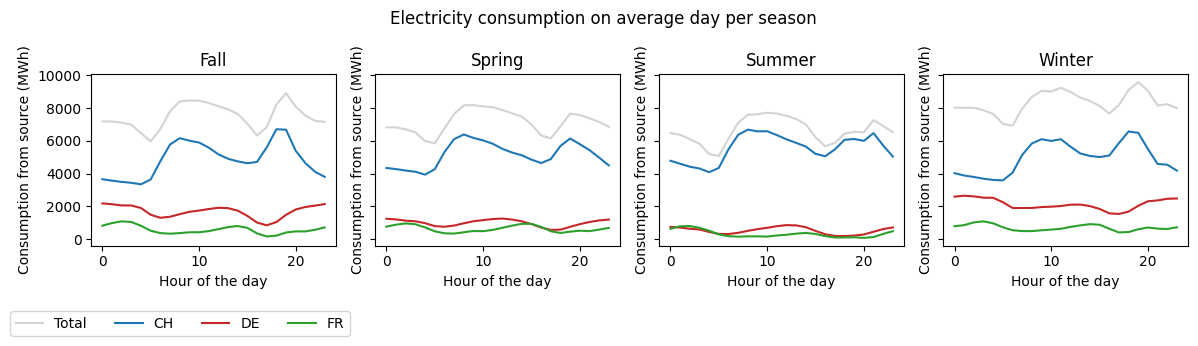

In [20]:
from etude_stat.analysis_functions import plot_typical_days

countries = ['sum', 'CH', 'DE', 'FR']
df = raw_production['df'][countries]

season_names = {2: 'Spring', 3: 'Summer', 4: 'Fall', 1: 'Winter'}
data = df.copy()
data['Season'] = [date.month % 12 // 3 + 1 for date in data.index]
data['Season'] = data['Season'].map(season_names)
grouped_data = data.groupby('Season')

season_labels = [*grouped_data.groups.keys()]
fig, ax = plt.subplots(1, len(season_labels), sharey=True, figsize=(12, 3))
for i in range(4):
    seasonal_data = [grouped_data.get_group(season)[data.columns[i]] for season in grouped_data.groups]
    plot_typical_days(seasonal_data, grouped_data, 'Electricity consumption', 'Consumption from source (MWh)', fig=fig,
                      ax=ax)
for i in range(len(season_labels)):
    for j in range(len(ax[i].get_lines())):
        ax[i].get_lines()[j].set_color(colormap[countries[j]])
fig.legend(['Total', 'CH', 'DE', 'FR'], loc='upper left', ncol=4, bbox_to_anchor=(0, 0));

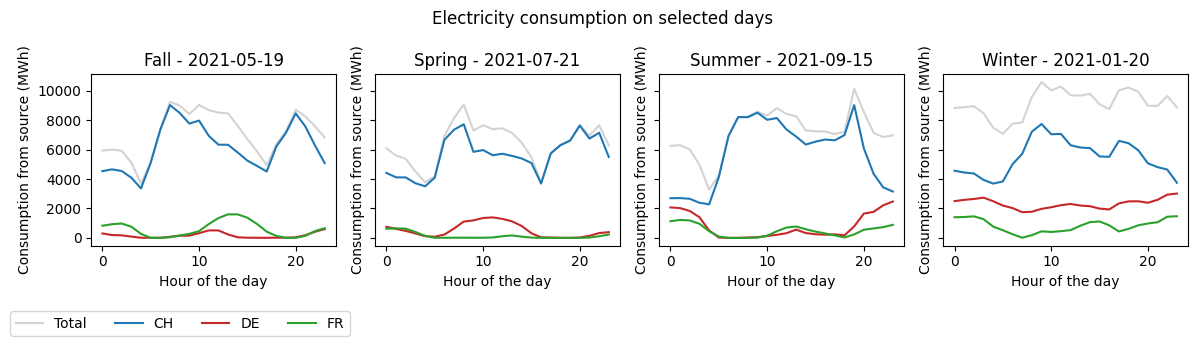

In [21]:
dates = ['2021-05-19', '2021-07-21', '2021-09-15', '2021-01-20']
fig, ax = plt.subplots(1, len(dates), sharey=True, figsize=(12, 3))
#for j in range(4):
for i in range(len(dates)):
    a = ax[i]
    by_hour = df.loc[pd.date_range(dates[i] + ' 00:00', dates[i] + ' 23:59', freq='H')]
    by_hour.index = by_hour.index.hour
    a.plot(by_hour)
    a.set_title(f'{season_labels[i]} - {dates[i]}')
    a.set_xlabel('Hour of the day')
    a.set_ylabel('Consumption from source (MWh)')
fig.suptitle(f'{"Electricity consumption"} on selected days')
fig.tight_layout()
for i in range(len(dates)):
    for j in range(len(ax[i].get_lines())):
        ax[i].get_lines()[j].set_color(colormap[countries[j]])
fig.legend(['Total', 'CH', 'DE', 'FR'], loc='upper left', ncol=4, bbox_to_anchor=(0, 0));

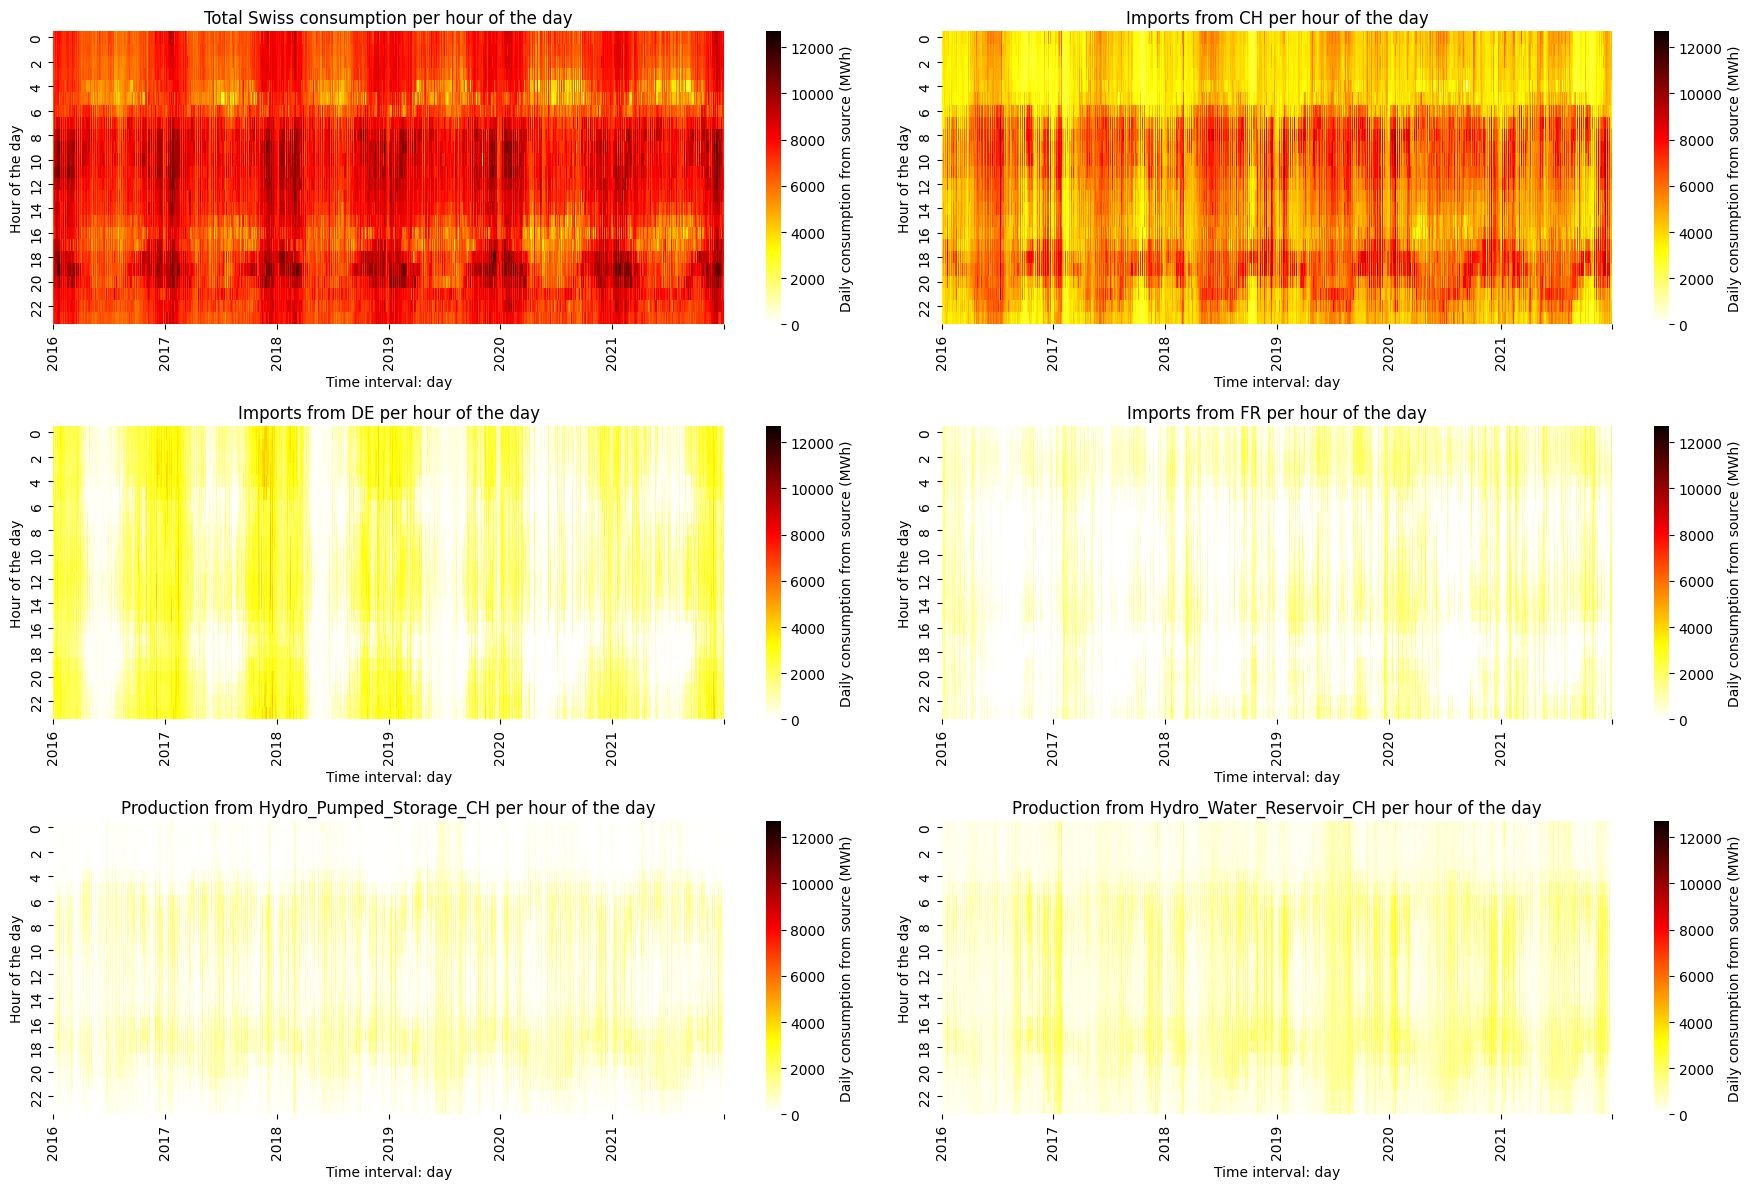

In [22]:
from etude_stat.analysis_functions import plot_heatmap

fig, ax = plt.subplots(3, 2, figsize=(18, 12))
# Heatmap import
val_max = data[countries].max().max()
for i in range(len(countries)):
    series = data[countries[i]]
    xlabels = list(series.resample('Y').mean().index.map(lambda x: x.year).values)
    plot_heatmap(data, xlabels, 'Imports from ' + countries[i], 'Daily consumption from source (MWh)',
                 index=i, val_max=val_max, fig=fig, ax=ax[i // 2, i % 2])

ax[0, 0].set_title('Total Swiss consumption per hour of the day')

# Heatmap hydro
cols = ['Hydro_Pumped_Storage_CH', 'Hydro_Water_Reservoir_CH']
data2 = raw_production['raw_df'][cols]
for i in range(len(cols)):
    series = data2[cols[i]]
    xlabels = list(series.resample('Y').mean().index.map(lambda x: x.year).values)
    plot_heatmap(data2, xlabels, 'Production from ' + cols[i], 'Daily consumption from source (MWh)',
                 index=i, val_max=val_max, fig=fig, ax=ax[2, i])

fig.tight_layout()

vBidouilles sur l'hydro :

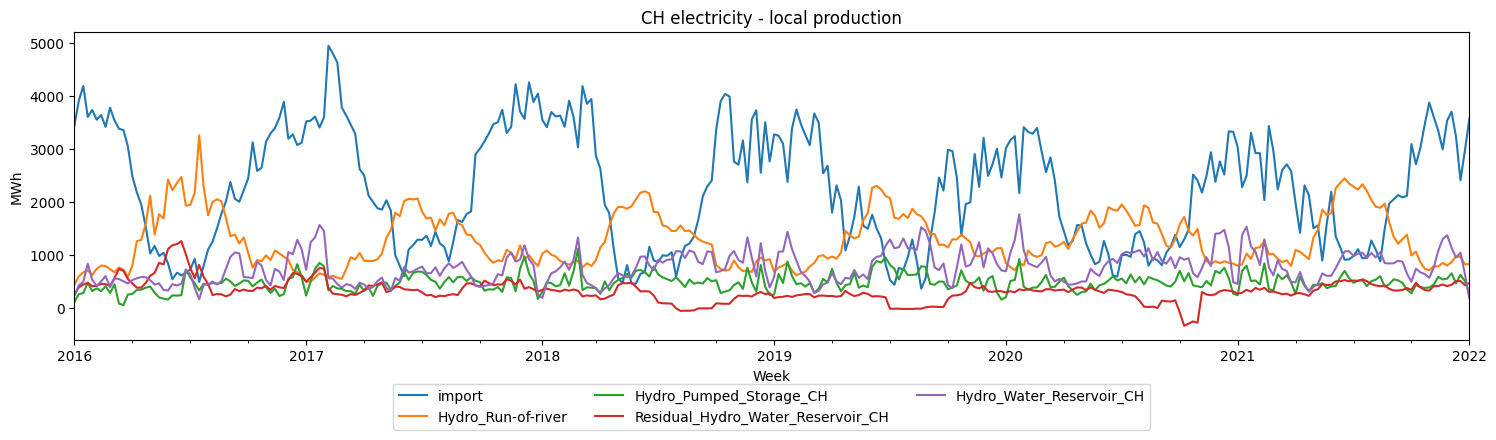

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title('CH electricity - local production')

df = raw_production['raw_df'].resample('W').mean()
df = df.drop(df.loc[:, [not k.endswith('CH') or 'Mix' in k for k in df.columns]], axis=1)
#local_cols = df.mean().nlargest(6).index.tolist()
local_cols = ['Residual_Hydro_Run-of-river_and_poundage_CH', 'Hydro_Run-of-river_and_poundage_CH']
df['Hydro_Run-of-river'] = df[local_cols].sum(axis=1)
df['import'] = (raw_production['df']['sum'] - raw_production['df']['CH']).resample('W').mean()
df[['import', 'Hydro_Run-of-river', 'Hydro_Pumped_Storage_CH', 'Residual_Hydro_Water_Reservoir_CH',
              'Hydro_Water_Reservoir_CH']].plot(ax=ax1, legend=False)
plt.xlabel('Week')
plt.ylabel('MWh')

ax1.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.12));

Hydro_Run-of-river


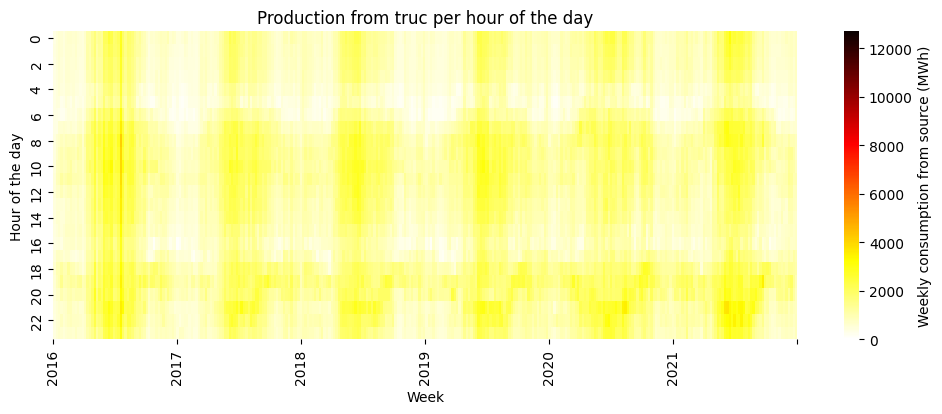

In [105]:
df = raw_production['raw_df']
df = df.drop(df.loc[:, [not k.endswith('CH') or 'Mix' in k for k in df.columns]], axis=1)
#local_cols = df.mean().nlargest(6).index.tolist()
local_cols = ['Residual_Hydro_Run-of-river_and_poundage_CH', 'Hydro_Run-of-river_and_poundage_CH']
df['Hydro_Run-of-river'] = df[local_cols].sum(axis=1)
series = df['Hydro_Run-of-river']
xlabels = list(series.resample('Y').mean().index.map(lambda x: x.year).values)
print(df.columns[23])
plot_heatmap(df, xlabels, 'Production from truc', 'Weekly consumption from source (MWh)',
             index=23, val_max=val_max)

A part montrer que y'a pas de nucléaire en été, peu d'intérêt en plus :

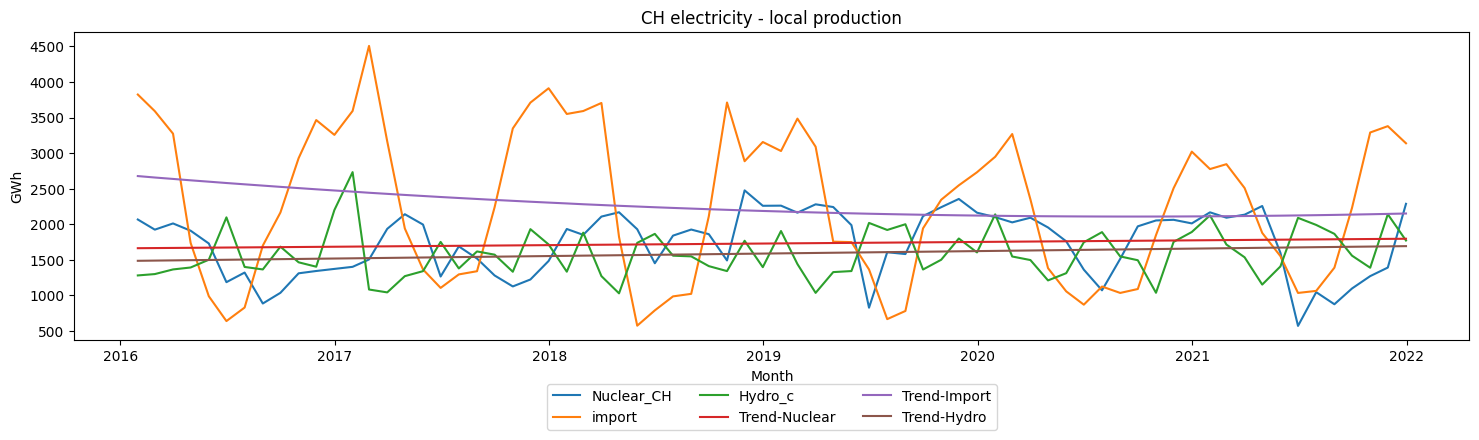

In [65]:
from etude_stat.analysis_functions import plot_trend

fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_title('CH electricity - local production')

df = raw_production['raw_df'].resample('M').mean()
df = df.drop(df.loc[:, [not k.endswith('CH') or 'Mix' in k for k in df.columns]], axis=1)
#local_cols = df.mean().nlargest(6).index.tolist()
local_cols = ['Residual_Hydro_Water_Reservoir_CH', 'Hydro_Pumped_Storage_CH', 'Hydro_Water_Reservoir_CH']
df['Hydro_c'] = df[local_cols].sum(axis=1)
df['import'] = (raw_production['df']['sum'] - raw_production['df']['CH']).resample('M').mean()
cols = ['Nuclear_CH', 'import', 'Hydro_c']
for col in cols:
    ax1.plot(df.index, df[col], label=col)
plot_trend(ax=ax1, df=df, y=df['Nuclear_CH'], degree=1, label='Trend-Nuclear')
plot_trend(ax=ax1, df=df, y=df['import'], degree=2, label='Trend-Import')
plot_trend(ax=ax1, df=df, y=df['Hydro_c'], degree=1, label='Trend-Hydro')
plt.xlabel('Month')
plt.ylabel('GWh')

ax1.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.12));

#### Comparaison pv/éolien avec IAE

In [27]:
raw_production['raw_df'].columns

Index(['Mix_Other', 'Biomass_AT', 'Fossil_Brown_coal/Lignite_AT',
       'Fossil_Coal-derived_gas_AT', 'Fossil_Gas_AT', 'Fossil_Hard_coal_AT',
       'Fossil_Oil_AT', 'Fossil_Oil_shale_AT', 'Fossil_Peat_AT',
       'Geothermal_AT',
       ...
       'Hydro_Run-of-river_and_poundage_IT', 'Hydro_Water_Reservoir_IT',
       'Marine_IT', 'Nuclear_IT', 'Other_fossil_IT', 'Other_renewable_IT',
       'Solar_IT', 'Waste_IT', 'Wind_Offshore_IT', 'Wind_Onshore_IT'],
      dtype='object', length=104)

In [58]:
wind_2021 = raw_production['raw_df'][['Residual_Hydro_Water_Reservoir_CH', 'Residual_Hydro_Run-of-river_and_poundage_CH', 'Residual_Other_CH']]['2021-01-01':'2021-12-31']
wind_2021 = raw_production['raw_df'][['Hydro_Run-of-river_and_poundage_CH']]['2021-01-01':'2021-12-31']
wind_2021 = wind_2021.resample('M').mean()
wind_2021

,Hydro_Run-of-river_and_poundage_CH
2021-01-31,138.752029
2021-02-28,165.055756
2021-03-31,127.525871
2021-04-30,154.997498
2021-05-31,198.751389
2021-06-30,261.268829
2021-07-31,207.242416
2021-08-31,192.292236
2021-09-30,144.846390
2021-10-31,136.003250


In [59]:
wind_2021.sum(axis=0)

Hydro_Run-of-river_and_poundage_CH    2037.837036
dtype: float32

In [60]:
wind_2021.sum(axis=0).sum()

2037.837

In [61]:
wind_2021 = raw_production['raw_df'][['Residual_Hydro_Water_Reservoir_CH', 'Residual_Hydro_Run-of-river_and_poundage_CH', 'Residual_Other_CH']]['2019-01-01':'2019-12-31']
wind_2021 = raw_production['raw_df'][['Hydro_Run-of-river_and_poundage_CH']]['2019-01-01':'2019-12-31']
wind_2021 = wind_2021.resample('M').mean()
wind_2021

,Hydro_Run-of-river_and_poundage_CH
2019-01-31,91.421852
2019-02-28,85.287262
2019-03-31,75.615318
2019-04-30,106.977943
2019-05-31,154.516891
2019-06-30,248.374161
2019-07-31,213.369827
2019-08-31,175.887589
2019-09-30,141.591171
2019-10-31,163.210388


In [62]:
wind_2021.sum(axis=0)

Hydro_Run-of-river_and_poundage_CH    1741.629028
dtype: float32

In [63]:
wind_2021.sum(axis=0).sum()

1741.629

### 1.3 Impact carbone

Impact carbone d'un kWh Suisse (moyenne sur une semaine pendant les 5 ans de l'étude)

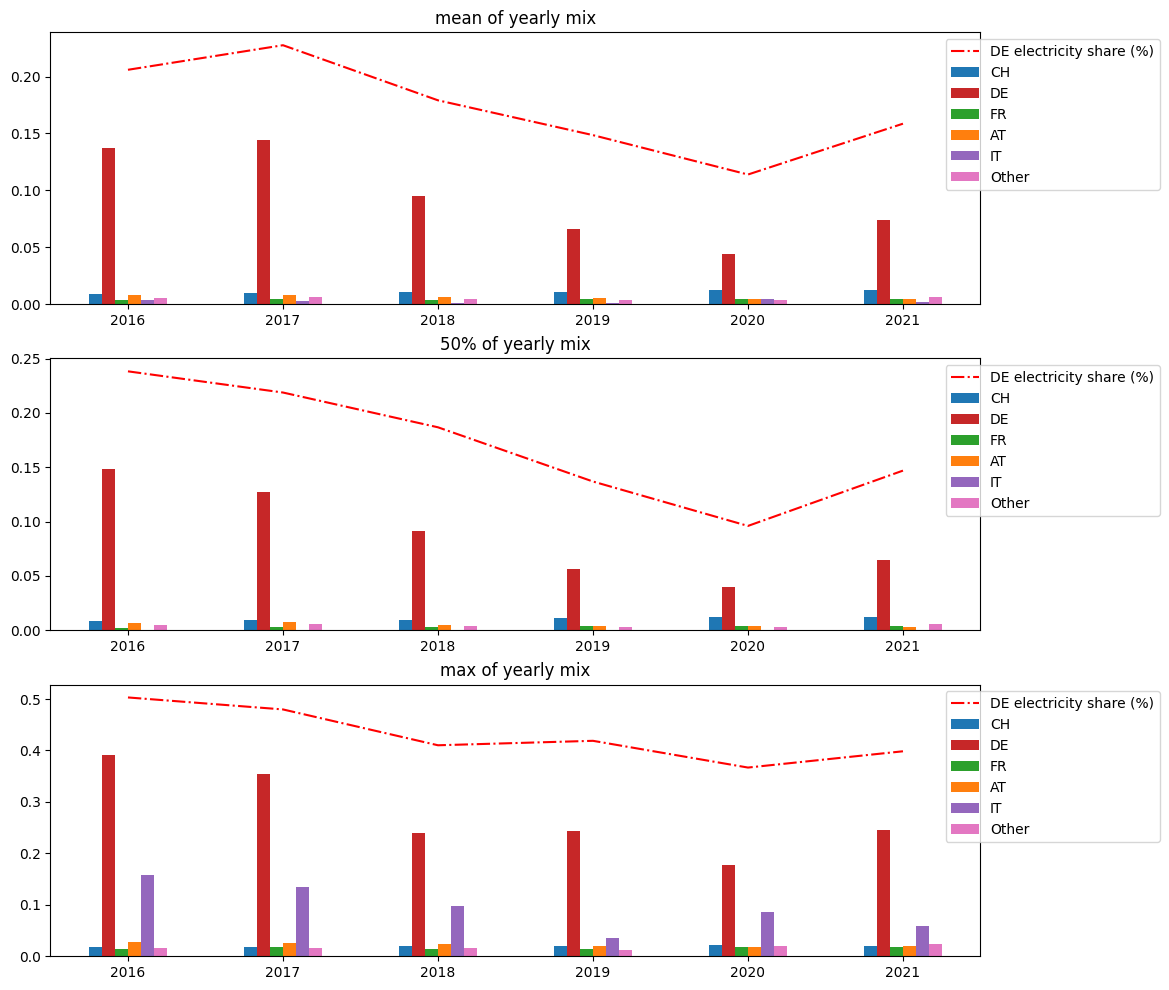

In [175]:
metrics = ['mean', '50%', 'max']  # Metrics to plot # '50%',
fig, ax = plt.subplots(len(metrics), 1, figsize=(12, 4 * len(metrics)))
plot_metrics(years, electricity_impact['df'][ordered_countries], 'yearly carbon impact', metrics, 'Y', ax=ax,
             linestyle='bar', color=ordered_colors)
plot_metrics(years, electricity_mix['df']['DE'], 'yearly mix', metrics, 'Y', ax=ax, linestyle='-.',
             label=["DE electricity share (%)"], color='red')

DE electricity is between 10 and 40% (mean 20%) of the Swiss electrical mix, but forms the majority of the carbon impact (between 60 and 90% of the total, mean 80%).

On affiche à gauche la production locale pilotable et les imports à partir de chaque pays en fonction de la consommation résiduelle (consommation totale - production locale des sources non pilotables).
On affiche à droite la production locale des sources pilotables en fonction de la consommation résiduelle.

In [176]:
all_import = raw_production['raw_df'].resample('H').mean()
all_import = all_import.drop(all_import.loc[:, [not k.startswith('Mix') for k in all_import.columns]], axis=1)
all_import

,Mix_Other
2016-01-01 00:00:00,4595.097168
2016-01-01 01:00:00,NaN
2016-01-01 02:00:00,NaN
2016-01-01 03:00:00,NaN
2016-01-01 04:00:00,NaN
...,...
2021-12-30 20:00:00,NaN
2021-12-30 21:00:00,NaN
2021-12-30 22:00:00,NaN
2021-12-30 23:00:00,NaN


KeyError: "['Hydro_Run-of-river_and_poundage_AT', 'Marine_AT', 'Other_renewable_AT', 'Solar_AT', 'Waste_AT', 'Wind_Offshore_AT', 'Wind_Onshore_AT', 'Hydro_Run-of-river_and_poundage_DE', 'Marine_DE', 'Other_renewable_DE', 'Solar_DE', 'Waste_DE', 'Wind_Offshore_DE', 'Wind_Onshore_DE', 'Hydro_Run-of-river_and_poundage_FR', 'Marine_FR', 'Other_renewable_FR', 'Solar_FR', 'Waste_FR', 'Wind_Offshore_FR', 'Wind_Onshore_FR', 'Hydro_Run-of-river_and_poundage_IT', 'Marine_IT', 'Other_renewable_IT', 'Solar_IT', 'Waste_IT', 'Wind_Offshore_IT', 'Wind_Onshore_IT'] not found in axis"

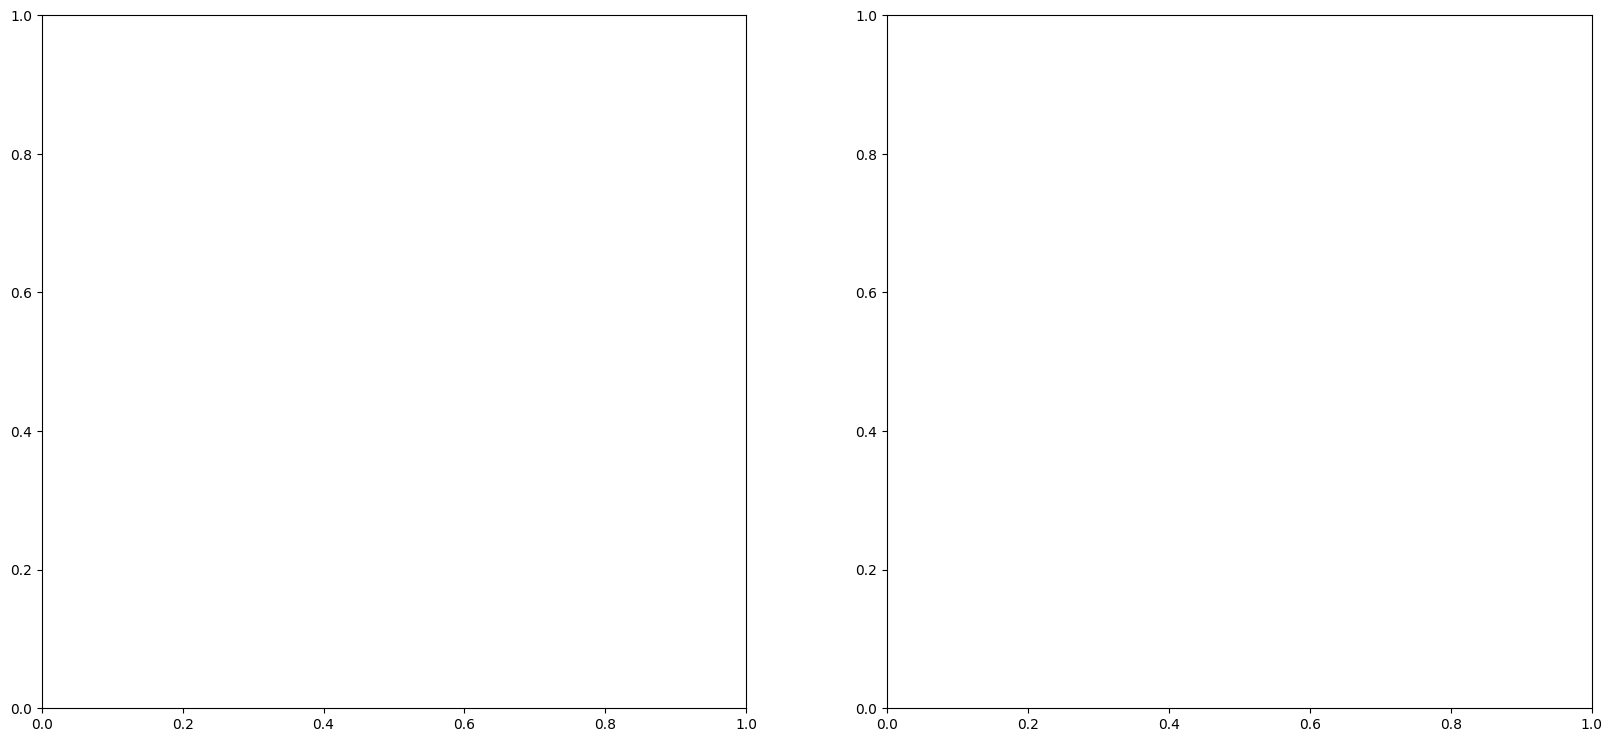

In [177]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=False)
prod_per_source = raw_production['raw_df'].resample('H').mean()
prod_per_source_local = prod_per_source.drop(
    prod_per_source.loc[:, [not k.endswith('CH') or 'Mix' in k for k in prod_per_source.columns]], axis=1)
prod_per_source['Mix_CH_CH'] = prod_per_source_local.sum(axis=1)
prod_per_source['total'] = raw_production['df']['sum'].resample('H').mean()

# Subtracting the fatal power
fatal_power = prod_per_source.drop(
    prod_per_source.loc[:, [not k[:-3] in fatal_sources for k in prod_per_source.columns]], axis=1)
prod_per_source_local = prod_per_source_local.drop(fatal_power.columns, axis=1)
fatal_power = fatal_power.sum(axis=1)
prod_per_source['total'] = prod_per_source['total'] - fatal_power

# Import sources
ax[0].set_title("Production per source against residual demand - import sources")
columns = list(map(lambda x: 'Mix_' + x + '_CH', ordered_countries))
for i in range(len(columns)):
    prod_per_source.plot.scatter(x='total', y=columns[i], ax=ax[0], c=colormap[ordered_countries[i]], label=columns[i],
                                 s=0.2)
ax[0].set_xlabel('Residual demand (MWh)')
ax[0].set_ylabel('Production (MWh)')

# Local sources
ax[1].set_title("Production per source against residual demand - CH  controllable sources")  # todo voc ?
columns = prod_per_source_local.mean().nlargest(3).index.tolist()  # Limit to 3 to remove zero values
#columns.append('Mix_DE_CH')

all_import = raw_production['raw_df'].resample('H').mean()
all_import = all_import.drop(all_import.loc[:, [not k.startswith('Mix') for k in all_import.columns]], axis=1).sum(
    axis=1)
prod_per_source['import'] = all_import
columns.append('import')

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
for i in range(len(columns)):
    prod_per_source.plot.scatter(x='total', y=columns[i], ax=ax[1], c=colors[i], label=columns[i], s=.2)
ax[1].set_xlabel('Residual demand (MWh)')
ax[1].set_ylabel('Production (MWh)');

KeyError: 'Mix_DE_CH'

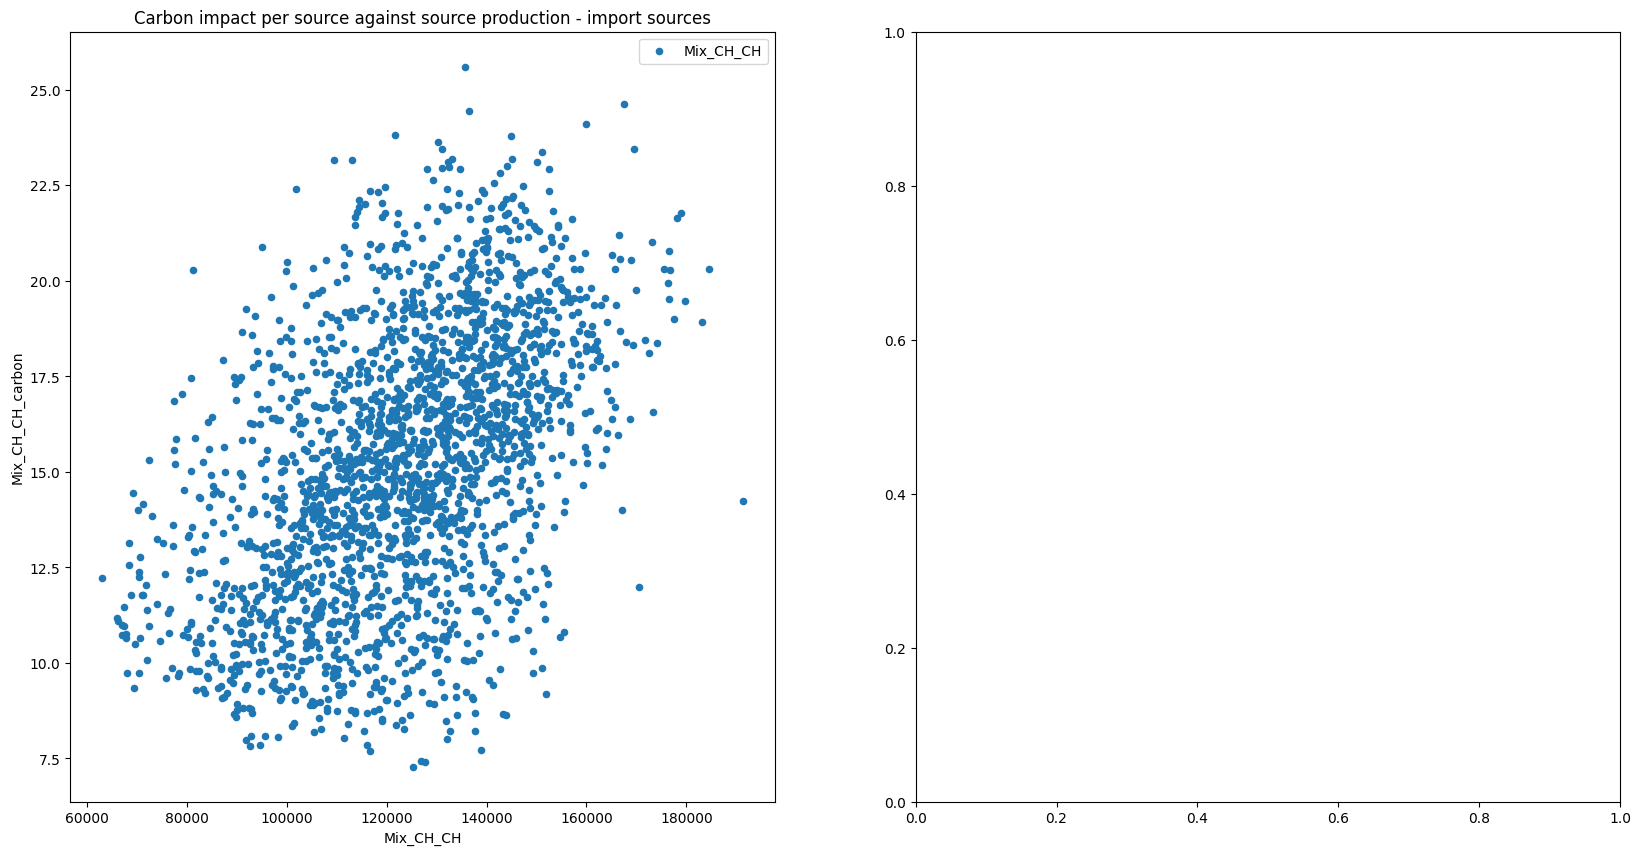

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=False)
columns = list(map(lambda x: 'Mix_' + x + '_CH', ordered_countries))

prod_per_source = raw_production['raw_df'].resample('H').mean()
prod_per_source_local = prod_per_source.drop(
    prod_per_source.loc[:, [not k.endswith('CH') or 'Mix' in k for k in prod_per_source.columns]], axis=1)
prod_per_source['Mix_CH_CH'] = prod_per_source_local.sum(axis=1)
prod_per_source['total'] = raw_production['df']['sum'].resample('H').mean()

#d_carbon = electricity_impact['df'].drop(['sum'], axis=1).resample('W').mean()
d_carbon = producing_electricity_impact.drop(['sum'], axis=1).resample('H').mean()
d_carbon.columns = list(map(lambda x: 'Mix_' + x + '_CH', d_carbon.columns))
df_local_carbon = electricity_impact['raw_df'][prod_per_source_local.columns].resample('H').mean()
#d_carbon['Mix_CH_CH'] = df_local_carbon.sum(axis=1)

df = prod_per_source.copy()
for col in columns:
    df[col + '_carbon'] = d_carbon[col]  # convert to kgCO2eq
for col in prod_per_source_local.columns:
    df[col + '_carbon'] = df_local_carbon[col]  # convert to kgCO2eq

ax[0].set_title("Carbon impact per source against source production - import sources")
for i in range(len(columns)):
    df.plot.scatter(x=columns[i], y=columns[i] + '_carbon', ax=ax[0], c=colormap[ordered_countries[i]],
                    label=columns[i])
ax[0].set_xlabel('Production/Import (MWh)')
ax[0].set_ylabel('Carbon impact (kgCO2eq)')

local_cols = prod_per_source_local.mean().nlargest(8).index.tolist()
ax[1].set_title("Carbon impact per source against source production - CH sources")
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
for i in range(len(local_cols)):
    df.plot.scatter(x=local_cols[i], y=local_cols[i] + '_carbon', ax=ax[1], c=colors[i], label=local_cols[i])
ax[1].set_xlabel('Production (MWh)')
ax[1].set_ylabel('Carbon impact (kgCO2eq)');

### 3. Analysis of the GWP impact

In [311]:
d_carbon.columns

Index(['AT', 'CH', 'CZ', 'DE', 'FR', 'IT', 'Other', 'Mix_CH_CH'], dtype='object')

In [312]:
ordered_countries

['CH', 'DE', 'FR', 'AT', 'IT', 'CZ', 'Other']

Impact of production mix vs impact of consumption mix

In [1]:
producing_electricity_impact['sum']

SyntaxError: unterminated string literal (detected at line 1) (2215164225.py, line 1)

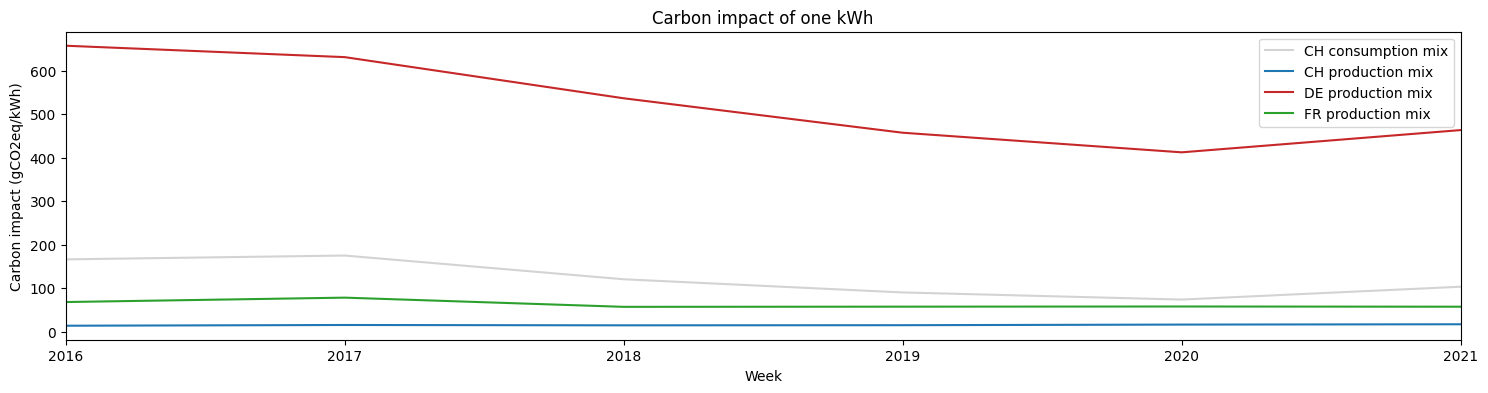

In [180]:
to_plot = ['sum', 'CH', 'DE', 'FR']
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.set_title("Carbon impact of one kWh")
producing_electricity_impact[to_plot].resample('Y').mean().plot(ax=ax, color=[colormap[c] for c in to_plot])
ax.legend(['CH consumption mix', 'CH production mix', 'DE production mix', 'FR production mix'])
ax.set_xlabel('Week')
ax.set_ylabel('Carbon impact (gCO2eq/kWh)');

In [188]:
electricity_mix['df'][to_plot].resample('Y').mean().loc['2019-12-31']

sum    1.000000
CH     0.728022
DE     0.148500
FR     0.082428
Name: 2019-12-31 00:00:00, dtype: float64

In [189]:
electricity_mix['df'][to_plot].resample('Y').mean().loc['2021-12-31']

sum    1.000000
CH     0.702938
DE     0.158581
FR     0.092064
Name: 2021-12-31 00:00:00, dtype: float64